<a href="https://colab.research.google.com/github/DanielCalimayor/DS-Unit-2-Regression-2/blob/master/Daniel_Calimayor_DS_Sprint_Challenge_8_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Regression 2 Sprint Challenge: Predict drugstore sales 🏥

For your Sprint Challenge, you'll use real-world sales data from a German drugstore chain, from Jan 2, 2013 — July 31, 2015.

You are given three dataframes:

- `train`: historical sales data for 100 stores
- `test`: historical sales data for 100 different stores
- `store`: supplemental information about the stores


The train and test set do _not_ have different date ranges. But they _do_ have different store ids. Your task is _not_ to forecast future sales from past sales. **Your task is to predict sales at unknown stores, from sales at known stores.**

In [0]:
import pandas as pd
train = pd.read_csv('https://drive.google.com/uc?export=download&id=1E9rgiGf1f_WL2S4-V6gD7ZhB8r8Yb_lE')
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1vkaVptn4TTYC9-YPZvbvmfDNHVR8aUml')
store = pd.read_csv('https://drive.google.com/uc?export=download&id=1rZD-V1mWydeytptQfr-NL7dBqre6lZMo')
assert train.shape == (78400, 7)
assert test.shape == (78400, 7)
assert store.shape == (200, 10)

The dataframes have a variety of columns:

- **Store** - a unique Id for each store
- **DayOfWeek** - integer, 1-6
- **Date** - the date, from Jan 2, 2013 — July 31, 2015.
- **Sales** - the units of inventory sold on a given date (this is the target you are predicting)
- **Customers** - the number of customers on a given date
- **Promo** - indicates whether a store is running a promo on that day
- **SchoolHoliday** - indicates the closure of public schools
- **StoreType** - differentiates between 4 different store models: a, b, c, d
- **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
- **CompetitionDistance** - distance in meters to the nearest competitor store
- **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
- **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
- **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

This Sprint Challenge has three parts. To demonstrate mastery on each part, do all the required instructions. To earn a score of "3" for the part, also do the stretch goals.

## 1. Wrangle relational data, Log-transform the target
- Merge the `store` dataframe with the `train` and `test` dataframes. 
- Arrange the X matrix and y vector for the train and test sets.
- Log-transform the target for the train and test set.
- Plot the target's distribution for the train set, before and after the transformation.

#### Stretch goals
- Engineer 3+ more features.

In [0]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
1,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
2,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
3,11,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
4,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [0]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,200.000000,199.000000,163.000000,163.000000,200.000000,36.000000,36.000000
mean,538.750000,4971.758794,7.319018,2010.748466,0.180000,23.916667,2011.666667
std,318.711977,7828.182796,3.165605,2.477911,0.385152,13.645250,0.956183
min,4.000000,30.000000,1.000000,2005.000000,0.000000,1.000000,2010.000000
25%,259.250000,890.000000,4.000000,2009.000000,0.000000,14.000000,2011.000000
50%,534.500000,2180.000000,9.000000,2011.000000,0.000000,22.000000,2012.000000
75%,819.500000,4655.000000,9.000000,2013.000000,0.000000,35.000000,2012.000000
max,1113.000000,48330.000000,12.000000,2015.000000,1.000000,48.000000,2013.000000


In [0]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [0]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday
0,4,5,2015-07-31,13995,1498,1,1
1,8,5,2015-07-31,8492,833,1,1
2,11,5,2015-07-31,10457,1236,1,1
3,12,5,2015-07-31,8959,962,1,1
4,34,5,2015-07-31,11144,1162,1,1


In [0]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Promo             int64
SchoolHoliday     int64
dtype: object

In [0]:
import numpy as np

In [0]:
train = train.replace([np.inf, -np.inf], np.nan)

In [0]:
train = train.drop(columns =['Date'])

In [0]:
train.dtypes

Store            int64
DayOfWeek        int64
Sales            int64
Customers        int64
Promo            int64
SchoolHoliday    int64
dtype: object

In [0]:
store = store.replace([np.inf, -np.inf], np.nan)
  
store['Promo2SinceYear'] = pd.to_datetime(store['Promo2SinceYear'], infer_datetime_format=True).dt.year
  
store['CompetitionOpenSinceYear'] = pd.to_datetime(store['CompetitionOpenSinceYear'], infer_datetime_format=True).dt.year
  
store['CompetitionOpenSinceMonth'] = pd.to_datetime(store['CompetitionOpenSinceMonth'], infer_datetime_format=True).dt.month
   

  

In [0]:
train = (train.merge(store, how='left')).fillna(0)
test = (test.merge(store, how = 'left')).fillna(0)

In [0]:
trainval_sales = train['Sales'].unique()
test_sales = test['Sales'].unique()
len(trainval_sales), len(test_sales)

(12543, 13286)

In [0]:
set(trainval_sales) & set(test_sales)

{1951,
 1954,
 1964,
 1991,
 2020,
 2023,
 2047,
 2064,
 2068,
 2081,
 2084,
 2090,
 2113,
 2115,
 2139,
 2145,
 2148,
 2153,
 2156,
 2157,
 2184,
 2185,
 2188,
 2190,
 2193,
 2195,
 2200,
 2202,
 2210,
 2211,
 2214,
 2216,
 2223,
 2225,
 2234,
 2242,
 2249,
 2266,
 2274,
 2277,
 2280,
 2283,
 2285,
 2286,
 2288,
 2291,
 2299,
 2300,
 2303,
 2308,
 2318,
 2320,
 2321,
 2325,
 2326,
 2327,
 2329,
 2337,
 2347,
 2352,
 2354,
 2355,
 2358,
 2359,
 2367,
 2368,
 2370,
 2371,
 2372,
 2373,
 2378,
 2385,
 2387,
 2389,
 2396,
 2399,
 2402,
 2404,
 2408,
 2411,
 2414,
 2415,
 2417,
 2422,
 2423,
 2427,
 2428,
 2430,
 2434,
 2439,
 2440,
 2442,
 2443,
 2445,
 2447,
 2449,
 2451,
 2454,
 2455,
 2456,
 2458,
 2459,
 2463,
 2465,
 2468,
 2469,
 2472,
 2475,
 2477,
 2478,
 2480,
 2482,
 2483,
 2487,
 2488,
 2489,
 2491,
 2494,
 2496,
 2497,
 2498,
 2499,
 2503,
 2504,
 2506,
 2507,
 2508,
 2509,
 2511,
 2512,
 2518,
 2519,
 2523,
 2525,
 2526,
 2528,
 2529,
 2532,
 2537,
 2539,
 2540,
 2541,
 2543,

In [0]:
from sklearn.model_selection import train_test_split
train_sales, val_sales = train_test_split(
    trainval_sales, random_state=42)
train_sales.shape, val_sales.shape

((9407,), (3136,))

In [0]:
set(train_sales) & set(val_sales)

set()

In [0]:
train = train[train.Sales.isin(train_sales)]
val = test[test.Sales.isin(val_sales)]

In [0]:
train.shape , val.shape

((58945, 15), (18759, 16))

In [0]:
target = 'Store'
features = train.columns.drop([target, 'Sales'])
x_train = train[features]
x_val = val[features]
y_train = train[target]
y_val = val[target]
test = test[features]

In [0]:
y_train.describe()

count    58945.000000
mean       545.764170
std        325.570488
min          4.000000
25%        260.000000
50%        551.000000
75%        834.000000
max       1113.000000
Name: Store, dtype: float64

In [0]:
y_val_log = np.log1p(y_val)
y_train_log = np.log1p(y_train)
y_train_log.describe()

count    58945.000000
mean         5.957406
std          1.087337
min          1.609438
25%          5.564520
50%          6.313548
75%          6.727432
max          7.015712
Name: Store, dtype: float64

## 2. Fit and validate your model
- **Use Gradient Boosting** or any type of regression model.
- **Beat the baseline:** The estimated baseline Root Mean Squared Logarithmic Error is 0.90, if we guessed the mean sales for every prediction. Remember that RMSE with the log-transformed target is equivalent to RMSLE with the original target. Try to get your error below 0.20.
- **To validate your model, choose any one of these options:**
  - Split the train dataframe into train and validation sets. Put all dates for a given store into the same set. Use xgboost `early_stopping_rounds` with the validation set. 
  - Or, use scikit-learn `cross_val_score`. Put all dates for a given store into the same fold.
  - Or, use scikit-learn `RandomizedSearchCV` for hyperparameter optimization. Put all dates for a given store into the same fold.
- **Get the Validation Error** (multiple times if you try multiple iterations) **and Test Error** (one time, at the end).
  
#### Stretch goal
- Optimize 3+ hyperparameters by searching 10+ "candidates" (possible combinations of hyperparameters). 

In [0]:
y_val_log.describe()

count    18759.000000
mean         5.992607
std          0.939799
min          2.397895
25%          5.509388
50%          6.272877
75%          6.699500
max          7.004882
Name: Store, dtype: float64

In [0]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

In [0]:

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

model.fit(x_train, y_train_log)
y_pred_log = model.predict(x_val)
rmse(y_val_log, y_pred_log)

ValueError: ignored

In [0]:
import category_encoders as ce
from scipy.stats import randint, uniform
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

encoder = ce.OrdinalEncoder()
x_train_encoded = encoder.fit_transform(x_train)
x_val_encoded = encoder.transform(x_val)
eval_set = [(x_train_encoded, y_train_log), 
            (x_val_encoded, y_val_log)]
model = XGBRegressor(n_estimators=2000, n_jobs=-1)
model.fit(X_train_encoded, y_train_log, 
          eval_set=eval_set, eval_metric='rmse', early_stopping_rounds=50)

[17:59:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.10961	validation_1-rmse:5.11293
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[1]	validation_0-rmse:4.70559	validation_1-rmse:4.70597
[2]	validation_0-rmse:4.34803	validation_1-rmse:4.34625
[3]	validation_0-rmse:4.02799	validation_1-rmse:4.02443
[4]	validation_0-rmse:3.74986	validation_1-rmse:3.74666
[5]	validation_0-rmse:3.50454	validation_1-rmse:3.50258
[6]	validation_0-rmse:3.29137	validation_1-rmse:3.29118
[7]	validation_0-rmse:3.10505	validation_1-rmse:3.10711
[8]	validation_0-rmse:2.94376	validation_1-rmse:2.9498
[9]	validation_0-rmse:2.80034	validation_1-rmse:2.81126
[10]	validation_0-rmse:2.6793	validation_1-rmse:2.69475
[11]	validation_0-rmse:2.57541	validation_1-rmse:2.59497
[12]	validation_0-rmse:2.42935	validation_1-rmse:2.4487
[13]	validation_0-rmse:2.35345	validation_1-rmse:2.37839
[14]	validation_0-rmse:2.23997	validation_1-rmse:2.26654
[15]	validation_0-rmse:2.14797	validation_1-rmse:2.18936
[16]	validation_0-rmse:2.10797	validation_1-rmse:2.15369
[17]	validation_0-rmse:2.03507	validation_1-rmse:2.09162
[18]	validation_0-rmse:1.9783	validation_1-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:

pipeline = make_pipeline(ce.OrdinalEncoder(),XGBRegressor(random_state=42))

param_distributions = {'xgbregressor__n_estimators': randint(500, 1000),
                       'xgbregressor__max_depth': randint(3, 7)}

search = RandomizedSearchCV(pipeline,param_distributions=param_distributions,
                            n_iter=5,cv=2,scoring='neg_mean_squared_error',verbose=10,
    return_train_score=True,n_jobs=-1)

search.fit(x_train, y_train_log, groups=groups)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.8min finished
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:54:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=None,
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=None,
                                                             return_df=True,
                                                             verbose=0)),
                                             ('xgbregressor',
                                              XGBRegressor(base_score=0.5,
                                                           booster='gbtree',
                                                           col

In [0]:
from sklearn.model_selection import cross_val_score

kev = 3
groups = train['Sales']
scores = cross_val_score(pipeline, x_train, y_train_log, cv=kev,
                         scoring='neg_mean_squared_error', groups=groups)
print(f'RMSLE for {kev} folds:', np.sqrt(-scores))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:55:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:55:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:55:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE for 3 folds: [0.46040603 0.43929524 0.43649296]


In [0]:
rdf = pd.DataFrame(search.cv_results_)
rdf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,24.477969,0.000540,2.056004,0.022656,5,773,"{'xgbregressor__max_depth': 5, 'xgbregressor__...",-0.004420,-0.003170,-0.003795,0.000625,1,-0.001349,-0.002155,-0.001752,0.000403
1,17.800059,0.028291,1.159786,0.006551,4,698,"{'xgbregressor__max_depth': 4, 'xgbregressor__...",-0.005616,-0.004265,-0.004941,0.000675,5,-0.003205,-0.003804,-0.003504,0.000300
2,32.843366,0.218823,3.170626,0.023751,6,867,"{'xgbregressor__max_depth': 6, 'xgbregressor__...",-0.004682,-0.003404,-0.004043,0.000639,3,-0.000492,-0.000749,-0.000621,0.000128
3,37.037676,0.244278,3.721863,0.025148,6,984,"{'xgbregressor__max_depth': 6, 'xgbregressor__...",-0.004775,-0.003559,-0.004167,0.000608,4,-0.000415,-0.000622,-0.000518,0.000103
4,27.988897,0.120664,2.474033,0.086319,5,886,"{'xgbregressor__max_depth': 5, 'xgbregressor__...",-0.004420,-0.003176,-0.003798,0.000622,2,-0.001176,-0.001947,-0.001561,0.000386


## 3. Plot model interpretation visualizations
- Choose any one of these options:
  - Permutation Importances plot
  - Partial Dependency Plot, 1 feature isolation
  - Partial Dependency Plot, 2 feature interaction
  
#### Stretch goals
- Plot 2+ visualizations.
- Use permutation importances for feature selection. 

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, scoring='neg_mean_squared_error', cv='prefit', n_iter=2, random_state=42)

permuter.fit(x_val_encoded, y_val_log)
feature_names = X_val_encoded.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.1340 ± 0.0043,Assortment
0.1141 ± 0.0099,Promo2SinceWeek
0.0871 ± 0.0173,StoreType
0.0719 ± 0.0102,CompetitionDistance
0 ± 0.0000,PromoInterval
0 ± 0.0000,Promo2SinceYear
0 ± 0.0000,CompetitionOpenSinceYear
0 ± 0.0000,CompetitionOpenSinceMonth
0 ± 0.0000,SchoolHoliday
0 ± 0.0000,Promo


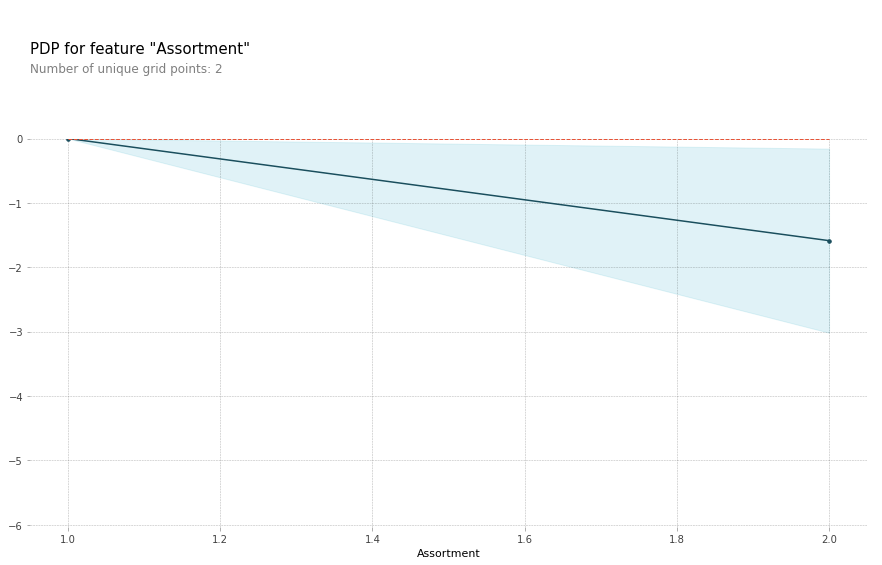

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Assortment'

isolated = pdp_isolate(
    model=model, 
    dataset=x_val_encoded, 
    model_features=x_val_encoded.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

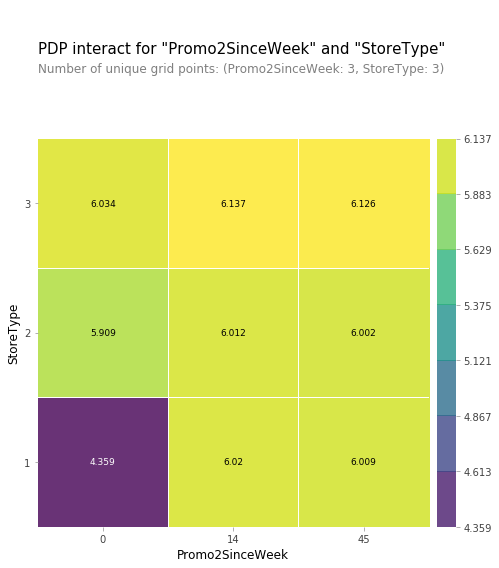

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Promo2SinceWeek', 'StoreType']

interaction = pdp_interact(
    model=model, 
    dataset=x_val_encoded, 
    model_features=x_val_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);